# 00 Post process using class

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

Utilize the abl_stats class to carry out post processing

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

In [2]:
from moa_python.post_abl_stats import Post_abl_stats
from moa_python.post_plane import Post_plane

## Case 004

In [47]:
case_folder = ['/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_9ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_10ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_12ms','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_12ms_2']

abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

if isinstance(case_folder,list):
    full_filename_abl_stats = []
    full_filename_hor_plane = []
    for n in range(len(case_folder)):
        full_filename_abl_stats = np.append(full_filename_abl_stats, os.path.join(case_folder[n],abl_stats_file ))
        full_filename_hor_plane = np.append(full_filename_hor_plane, os.path.join(case_folder[n],hor_plane_file ))
else:
    full_filename_abl_stats = [os.path.join(case_folder,abl_stats_file )]
    full_filename_hor_plane = [os.path.join(case_folder,hor_plane_file )]
    
abl = Post_abl_stats(full_filename_abl_stats)

Object is composed of 5 and time runs from [0.5 0.5 0.5 0.5 0.5] to [10800. 10800. 10800. 10800. 10800.]
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: e0ffbb62eb60-dirty
    created_on: Wed Jul 12 13:07:43 2023

    dimensions(sizes): num_time_steps(21600), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


In [48]:
settling_time = 7200
height = 150

Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]


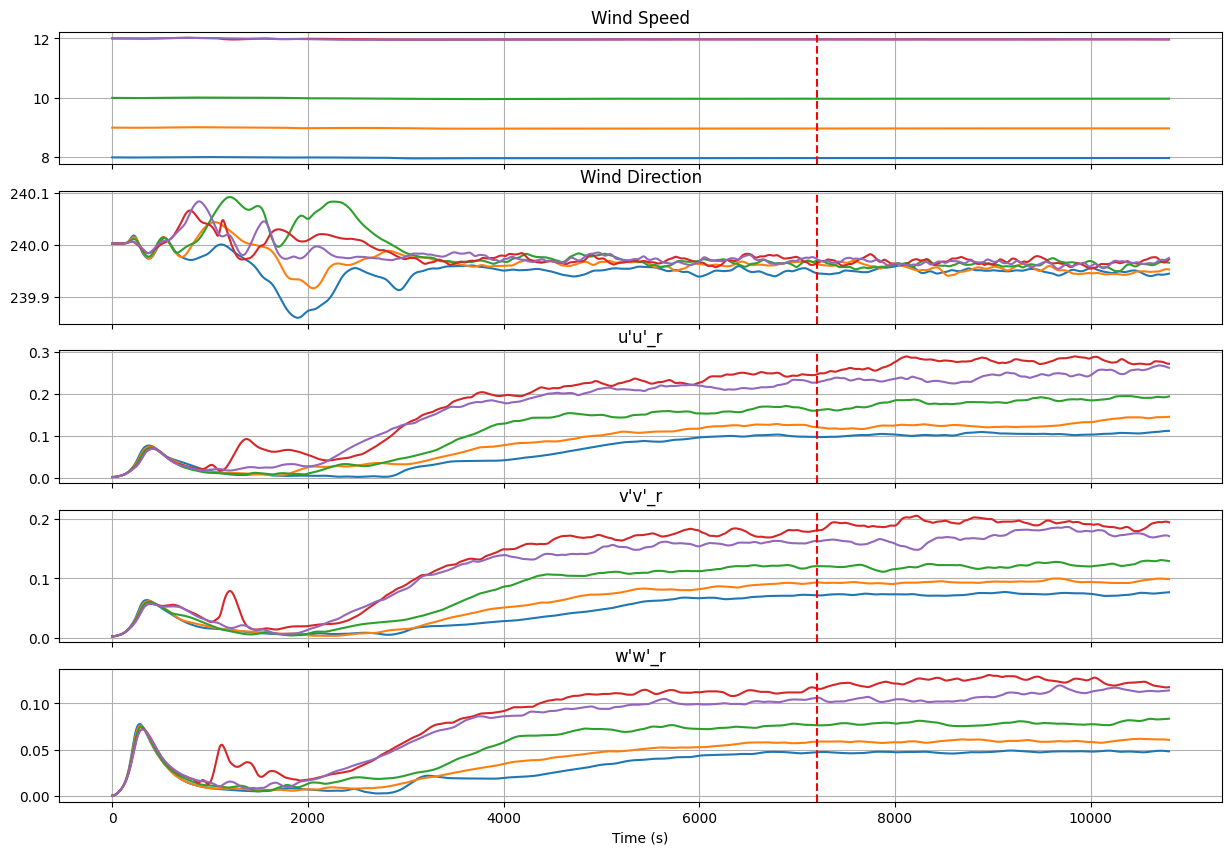

In [49]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

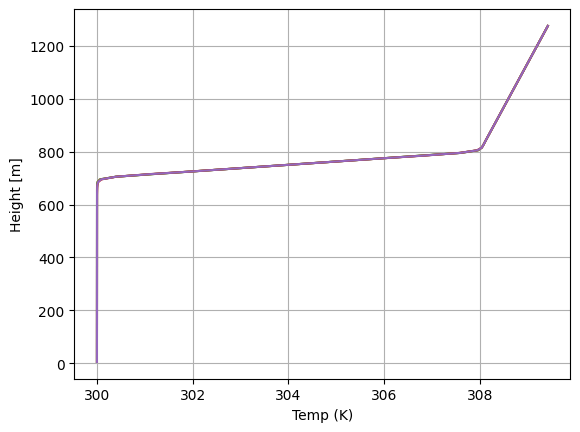

In [50]:
abl.plot_vertical_temp_profile(t_min=settling_time)

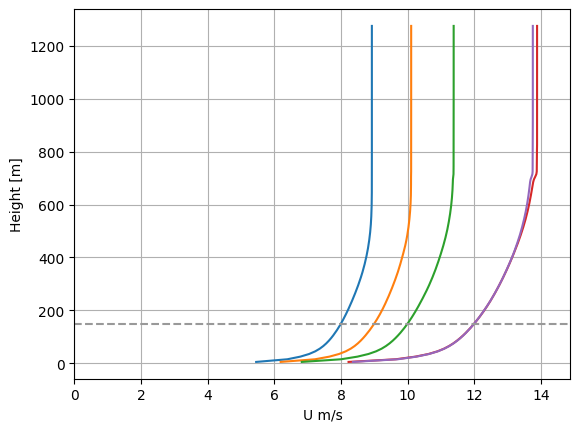

In [51]:
abl.plot_vertical_vel_profile(t_min=settling_time, height=height)

In [52]:
TI = abl.get_turbulence_intensity_at_height(height, t_min=settling_time)

print('Turbulence Intensity [%]: ', TI)

Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Nearest height to 150 is [145. 145. 145. 145. 145.]
Turbulence Intensity [%]:  [3.43830411 3.41326718 3.58122648 3.71375788 3.4840156 ]


Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [5. 5. 5. 5.] is [5. 5. 5. 5.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [15. 15. 15. 15.] is [15. 15. 15. 15.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [25. 25. 25. 25.] is [25. 25. 25. 25.]
Nearest height to [35.

Nearest height to [225. 225. 225. 225.] is [225. 225. 225. 225.]
Nearest height to [225. 225. 225. 225.] is [225. 225. 225. 225.]
Nearest height to [225. 225. 225. 225.] is [225. 225. 225. 225.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [235. 235. 235. 235.] is [235. 235. 235. 235.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [245. 245. 245. 245.] is [245. 245. 245. 245.]
Nearest height to [255. 2

Nearest height to [435. 435. 435. 435.] is [435. 435. 435. 435.]
Nearest height to [435. 435. 435. 435.] is [435. 435. 435. 435.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [445. 445. 445. 445.] is [445. 445. 445. 445.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [455. 455. 455. 455.] is [455. 455. 455. 455.]
Nearest height to [465. 465. 465. 465.] is [465. 465. 465. 465.]
Nearest height to [465. 4

Nearest height to [645. 645. 645. 645.] is [645. 645. 645. 645.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [655. 655. 655. 655.] is [655. 655. 655. 655.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [665. 665. 665. 665.] is [665. 665. 665. 665.]
Nearest height to [675. 675. 675. 675.] is [675. 675. 675. 675.]
Nearest height to [675. 675. 675. 675.] is [675. 675. 675. 675.]
Nearest height to [675. 6

Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [865. 865. 865. 865.] is [865. 865. 865. 865.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [875. 875. 875. 875.] is [875. 875. 875. 875.]
Nearest height to [885. 885. 885. 885.] is [885. 885. 885. 885.]
Nearest height to [885. 885. 885. 885.] is [885. 885. 885. 885.]
Nearest height to [885. 885. 885. 885.] is [885. 885. 885. 885.]
Nearest height to [885. 8

Nearest height to [1065. 1065. 1065. 1065.] is [1065. 1065. 1065. 1065.]
Nearest height to [1065. 1065. 1065. 1065.] is [1065. 1065. 1065. 1065.]
Nearest height to [1065. 1065. 1065. 1065.] is [1065. 1065. 1065. 1065.]
Nearest height to [1065. 1065. 1065. 1065.] is [1065. 1065. 1065. 1065.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1075. 1075. 1075. 1075.] is [1075. 1075. 1075. 1075.]
Nearest height to [1085. 1085. 1085. 1085.] is [1085. 1085. 1085. 1085.]
Nearest height to [1085. 1085. 1085. 1085.] is [1085. 1085. 1085. 1085.]
Nearest height to [1085. 1085. 1085. 1085.] is [1085. 1085. 1085. 1085.]
Nearest height to [1085. 1085. 1085. 1085.] is [108

Nearest height to [1255. 1255. 1255. 1255.] is [1255. 1255. 1255. 1255.]
Nearest height to [1255. 1255. 1255. 1255.] is [1255. 1255. 1255. 1255.]
Nearest height to [1255. 1255. 1255. 1255.] is [1255. 1255. 1255. 1255.]
Nearest height to [1255. 1255. 1255. 1255.] is [1255. 1255. 1255. 1255.]
Nearest height to [1255. 1255. 1255. 1255.] is [1255. 1255. 1255. 1255.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1265. 1265. 1265. 1265.] is [1265. 1265. 1265. 1265.]
Nearest height to [1275. 1275. 1275. 1275.] is [1275. 1275. 1275. 1275.]
Nearest height to [1275. 1275. 1275. 1275.] is [1275. 1275. 1275. 1275.]
Nearest height to [1275. 1275. 1275. 1275.] is [127

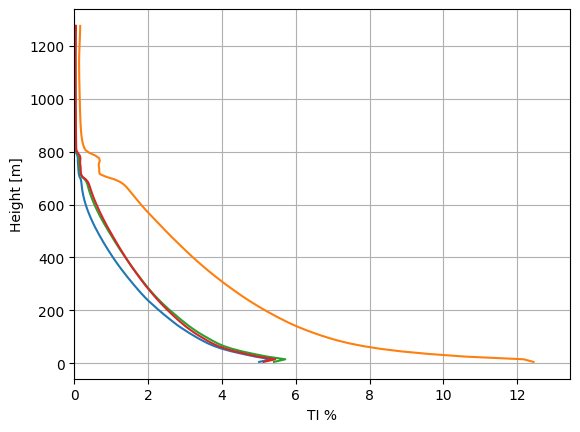

In [29]:
abl.plot_turbulence_intensity_profile(t_min=settling_time)

In [53]:
hor_plane = []
Nfiles = len(full_filename_hor_plane)
for n in range(Nfiles):
    hor_plane.append(Post_plane(full_filename_hor_plane[n],100))

Plane has 4 plane(s) in 22 time steps from 0.0 to 10500.0
Plane offsets: [  5.  90. 150. 255.]
Plane has 4 plane(s) in 22 time steps from 0.0 to 10500.0
Plane offsets: [  5.  90. 150. 255.]
Plane has 4 plane(s) in 22 time steps from 0.0 to 10500.0
Plane offsets: [  5.  90. 150. 255.]
Plane has 4 plane(s) in 22 time steps from 0.0 to 10500.0
Plane offsets: [  5.  90. 150. 255.]


FileNotFoundError: [Errno 2] No such file or directory: b'/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_12ms_2/post_processing/samplingPlane00000.nc'

Plotting u velocity for plane at location 150 at time 7200
Nearest plane to 150 is 150.0
Nearest time to 7200 is 7000.0
Returning u velocity plane for slice at 150.0 at time 7000.0
Plotting u velocity for plane at location 150 at time 7200
Nearest plane to 150 is 150.0
Nearest time to 7200 is 7000.0
Returning u velocity plane for slice at 150.0 at time 7000.0
Plotting u velocity for plane at location 150 at time 7200
Nearest plane to 150 is 150.0
Nearest time to 7200 is 7000.0
Returning u velocity plane for slice at 150.0 at time 7000.0
Plotting u velocity for plane at location 150 at time 7200
Nearest plane to 150 is 150.0
Nearest time to 7200 is 7000.0
Returning u velocity plane for slice at 150.0 at time 7000.0


IndexError: list index out of range

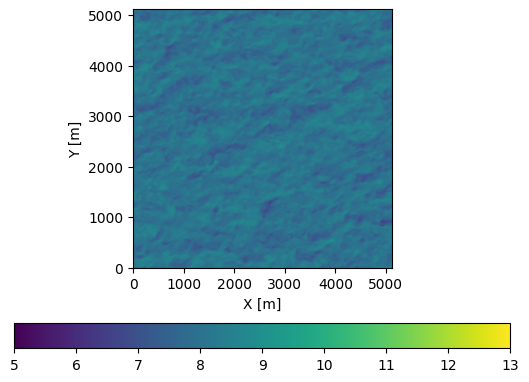

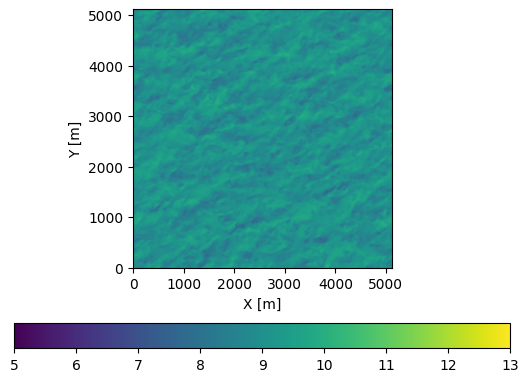

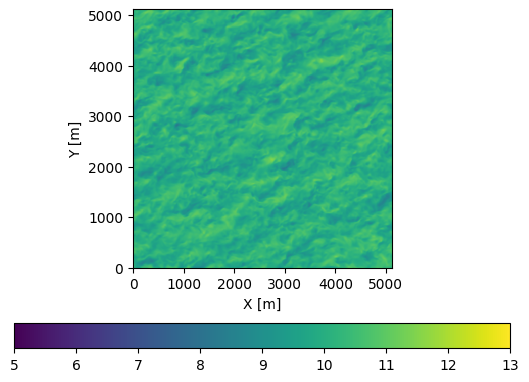

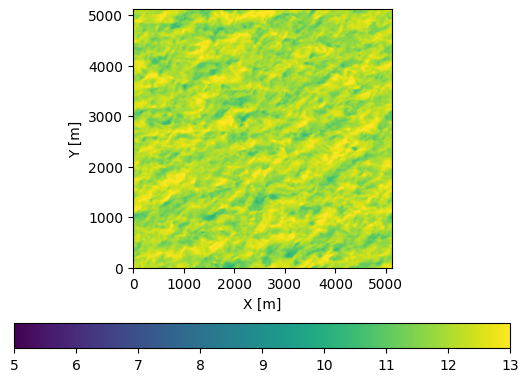

In [54]:
for n in range(Nfiles):
    hor_plane[n].plot_plane(height,settling_time, vmin=5., vmax=13.)

Plotting u mean velocity for plane at location 150
Nearest plane to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 0.0 is 0.0
Nearest time to 10500.0 is 10500.0
Plotting u mean velocity for plane at location 150
Nearest plane to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 0.0 is 0.0
Nearest time to 10500.0 is 10500.0
Plotting u mean velocity for plane at location 150
Nearest plane to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 0.0 is 0.0
Nearest time to 10500.0 is 10500.0
Plotting u mean velocity for plane at location 150
Nearest plane to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 0.0 is 0.0
Nearest time to 10500.0 is 10500.0


IndexError: list index out of range

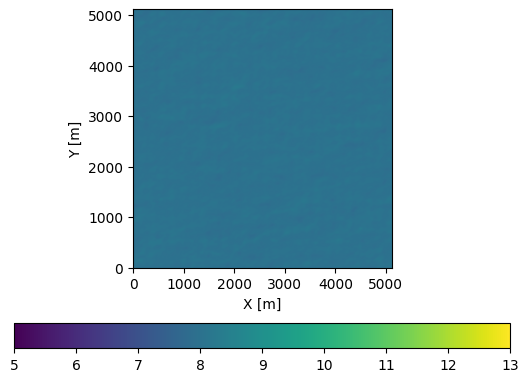

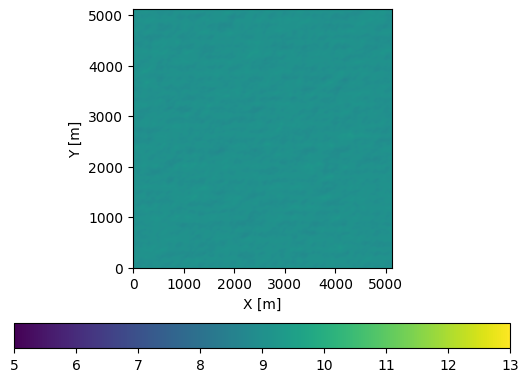

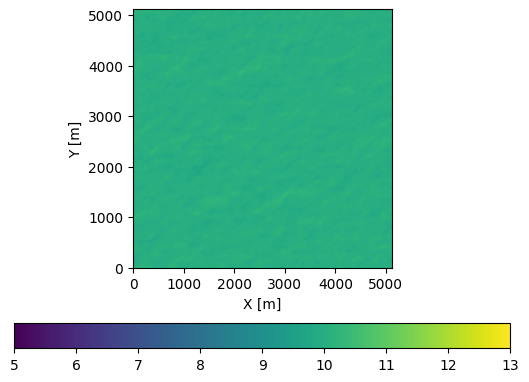

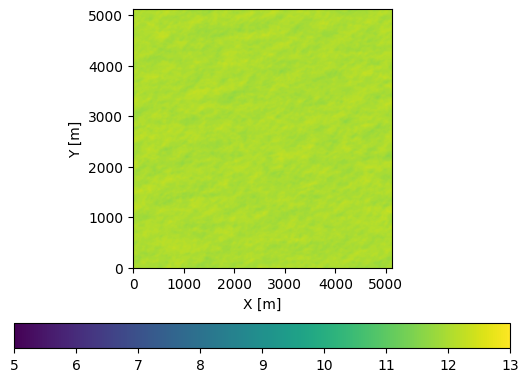

In [55]:
for n in range(Nfiles):
    hor_plane[n].plot_mean_plane(height, vmin=5., vmax=13.)

## Case 004 Restart

In [ ]:
case_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/restarts/baseline'
settling_time = settling_time + 0.5

In [ ]:
abl_stats_file = 'post_processing/abl_statistics14400.nc'
hor_plane_file = 'post_processing/samplingPlane14400.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl_restart = Post_abl_stats([full_filename_abl_stats])

In [ ]:
fig, axarr = plt.subplots(5,1,figsize=(9.5,8), sharex=True, tight_layout=True)
abl.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Precursor')
abl_restart.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Restart')
fig = plt.gcf


In [ ]:
abl.plot_vertical_temp_profile(t_min=settling_time)

In [ ]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [ ]:
hor_plane = Post_plane(full_filename_hor_plane)

In [ ]:
hor_plane.plot_plane(height,9000, vmin=5., vmax=11.)

In [ ]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)

### Case 005

In [ ]:
case_folder = '/scratch/pfleming/c2c/005_abl_neutral_lowTI_redo'


abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl = Post_abl_stats([full_filename_abl_stats])

In [ ]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

In [ ]:
abl.plot_vertical_temp_profile(t_min=settling_time)

In [ ]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [ ]:
hor_plane = Post_hor_plane(full_filename_hor_plane)

In [ ]:
hor_plane.plot_plane(height,settling_time, vmin=5., vmax=11.)

In [ ]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)